In [6]:
using Plots
using QuantumOptics

<center>
<h1>Coherent states</h1>
</center>

### What is a coherent state?

A coherent state is a quantum state of the harmonic oscillator (such as a light field) that have certain classical-like properties. These states are used in a variety of quantum mechanical settings, but are particularly important in quantum optics where they describe the light from a laser.

One key characteristic of coherent states is that they minimize the Heisenberg uncertainty principle for the quadrature components (amplitude and phase) of the light field. This means that they have the most well-defined phase and amplitude that is possible given the principles of quantum mechanics.



## The coherent states

They are defined as an eigenstate $(\alpha )$ of the annihilation operator $a$. The annihilation operator (which represents the removal of a photon from the light field) is  a key component in the quantization of the electromagnetic field:

$$
a | \alpha \rangle = \alpha | \alpha \rangle
$$

where $\alpha$ is a complex number. 

$$
| \alpha \rangle = e^{-\frac{|\alpha|^2}{2}} \sum_{n=0}^{\infty} \frac{\alpha^n}{\sqrt{n!}} |n\rangle
$$


### Some properties of coherent states

1. They are normalized: $$\langle \alpha | \alpha \rangle = 1$$
2. They are quasi-orhtogonal: $$\langle \alpha | \beta \rangle = e^{-\frac{|\alpha - \beta|^2}{2}}$$
3. Average photon number: $$\langle \alpha | \underbrace{a^{\dagger} a}_{\hat N} | \alpha \rangle = |\alpha|^2$$
4. Variance in photon number: $$(\Delta n)^2 = \langle \alpha | \hat N^2 | \alpha \rangle - \langle \alpha | \hat N | \alpha \rangle^2 = |\alpha|^2$$


### Photon number distribution

Now we can try to compute the probability of finding $n$ photons in a coherent state $|\alpha \rangle$. This is given by:

$$
P(n) = |\langle n | \alpha \rangle|^2 = \frac{|\alpha|^{2n}}{n!} e^{-|\alpha|^2} = \frac{e^{-\bar n\bar n^n}}{n!} 
$$

Let us see how this **Poissonian** distribution looks like for different values of $\bar n$:

In [ ]:
function P(n, bar_n)
    return exp(-bar_n) * bar_n^n / factorial(big(n))
end

function plot_P(bar_n)
    n = 0:30
    p = P.(n, bar_n)
    plot(n, p, marker=:circle, label="<n> = $bar_n")
end

@gif for bar_n in 0:0.1:20
    plot_P(bar_n)
end

We can see that the distribution is peaked around the mean value, and that the width of the distribution is proportional to the mean value, and as we increase the mean value, the distribution becomes more and more like a Gaussian.

### Expectation value of the electric field

We can also compute the expectation value of the electric field in a coherent state:

$$
\langle \alpha | \hat E(\xi) | \alpha \rangle = \langle \alpha | \sqrt{\frac{\hbar \omega}{2 \epsilon_0 V}} \hat a + \sqrt{\frac{\hbar \omega}{2 \epsilon_0 V}} \hat a^{\dagger} | \alpha \rangle = \sqrt{\frac{\hbar \omega}{2 \epsilon_0 V}} \langle \alpha | \hat a | \alpha \rangle + \sqrt{\frac{\hbar \omega}{2 \epsilon_0 V}} \langle \alpha | \hat a^{\dagger} | \alpha \rangle \\= |\alpha| \cos(\xi - theta)
$$

Where we have used the fact that $\langle \alpha | \hat a | \alpha \rangle = \alpha$, $\langle \alpha | \hat a^{\dagger} | \alpha \rangle = \alpha^*$, and that $\alpha \equiv |\alpha| e^{i \theta}$. 
The variance in the electric field is given by:

$$
(\Delta E)^2 = \langle \alpha | \hat E^2 | \alpha \rangle - \langle \alpha | \hat E | \alpha \rangle^2 = 1/4
$$

This means that the electric field in a coherent state is a classical field, and as we can see from the expression above, the variance in the electric field is independent of the mean photon number. A simple result from this is that as the magnitude of the electric field increases, the phase uncertainty relative importance decreases:

In [ ]:
function simple_E(A,ξ)
    return A * cos(ξ)
end

function plot_simple_E(A)
    ξ = 0:0.1:2π
    E = simple_E.(A, ξ)
    plot(ξ, E, title="α = $A", label="E(ξ)", xlabel="ξ", ylabel="E(ξ)",)
    # Plot minimum 
    plot!(ξ, E .+ 1/2, label="", color=:blue, linestyle=:dash)
    plot!(ξ, E .- 1/2, label="", color=:blue, linestyle=:dash)
    # Horizontal line
    plot!(ξ, 0*ξ, label="", color=:black)
end

@gif for A in 0:0.1:10
    plot_simple_E(A)
end

### The energy of a coherent state

It is quite straightforward to compute the energy of a coherent state:

$$
\langle \alpha | \hat H | \alpha \rangle = \hbar \omega \langle \alpha | \hat a^{\dagger} \hat a | \alpha \rangle = \hbar \omega (\bar n + 1/2)
$$

The fluctuations in the energy are given by a very similar expression:

$$
(\Delta H)^2 = \langle \alpha | \hat H^2 | \alpha \rangle - \langle \alpha | \hat H | \alpha \rangle^2 = \hbar^2 \omega^2 |\alpha|^2
$$


# Quadrature components of the electric field

The classical electric field can be written as:

$$
\hat E(\xi) = E_0 \cos(\overbrace{\omega t - \theta}^\xi) = E_0 \cos(\theta) \cos(\omega t) + E_0 \sin(\theta) \sin(\omega t) = E_0 \cos(\theta) \hat X + E_0 \sin(\theta) \hat Y
$$

$$
E = (X + i Y) e^{i \omega t}
$$

we'll be calling $\hat X$ and $\hat Y$ the quadrature components of the electric field. Thus, we can also write the operators $\hat X$ and $\hat Y$ in terms of the annihilation and creation operators:

$$X = \frac{1}{2} (\hat a + \hat a^{\dagger}) \quad \quad Y = \frac{1}{2i} (\hat a - \hat a^{\dagger})$$

Surprisingly, the quadrature components of the electric field $X$ and $Y$ are proportional to the position and momentum operators of the harmonic oscillator. This means that the quadrature components of the electric field are conjugate variables.

## Displacement operator

We can define a displacement operator $D(\alpha)$ that displaces the state of the harmonic oscillator by $\alpha$:

$$
|\alpha\rangle =D(\alpha) |0\rangle \quad \Rightarrow \quad D(\alpha) = e^{\alpha \hat a^{\dagger} - \alpha^* \hat a}
$$

Note that the displacement operator is unitary, and that it is a function of the annihilation and creation operators.

In [ ]:
function plot_orbit(θ, r)
    x = r * cos(θ)
    y = r * sin(θ)
    p1 = scatter([x], [y], label="", color=:blue, marker=:circle, markersize=10,
    xlabel="X", ylabel="Y", title="Quadrature phase space")
    # Line from origin to point
    plot!(p1, [0, x], [0, y], label="", color=:black, xlims=(-1.2, 1.2), ylims=(-1.2, 1.2))
    return p1
end

function plot_cos(θ)
    # Light line on previous values
    ys = sin.(0:0.1:θ)
    p2 = plot(0:0.1:θ, ys, label="", color=:blue, linestyle=:dash)
    plot!(0:0.1:θ, ys.-0.09, label="", linestyle=:dash, xlabel="ξ", ylabel="E(ξ)", title="Electric field", color=:red)
    plot!(0:0.1:θ, ys.+0.09, label="ΔE", linestyle=:dash, xlims=(0., 4π), ylims=(-1.2, 1.2), color=:red,)
    # Plot current value
    scatter!(p2, [θ], [sin(θ)], label="", color=:blue, marker=:circle, markersize=10)
    return p2
end

In [ ]:
@gif for θ in 0:0.1:4π
    p1 = plot_orbit(θ, 1)
    p2 = plot_cos(θ)
    plot(p1, p2, layout=(1,2), size=(800, 400))
end

### Phase space representation: Wigner function 

We have seen that the quadrature components of the electric field are conjugate variables, and that the coherent states minimize the uncertainty principle for these variables, meaning that in a experiment we won't be able to measure the quadrature components with a precision better than the one given by the uncertainty principle. Therefore, we can only think of them as probability densities:

$$P(X) = \bra{X} \hat \rho \ket{X} \quad \quad P(Y) = \bra{Y} \hat{\rho} \ket{Y}$$

where $\hat \rho$ is the density matrix of the system. But those seem to be independent probabilities, and we know that they are not, because they are conjugate variables. Therefore, we need to define a joint probability function, which is why we define the Wigner function.

Let us introduce the `position` and `momentum` operators as a vector: $\hat R = (\hat X, \hat Y)$, and the vector of quadrature components as $\hat Q = (\hat X, -\hat Y)$. We will still have the commutation relations:

$$[\hat R, \hat Q] = i \hbar \mathbb{I} \quad \Rightarrow \quad [\hat R_m, \hat R_n] = 2 i \hbar \epsilon_{mn}$$

In the space of quadrature components, we can also recall the displacement operator:

$$D(r) = e^{\frac{i}{2}(p \hat X - x \hat P)}$$

where $r = (x, p)$ is the vector of quadrature components. Then, we can define the Wigner function as:

$$W_\rho(r) = \frac{1}{2 \pi \hbar} \int_{-\infty}^{\infty} \bra{x + \frac{y}{2}} \hat \rho \ket{x - \frac{y}{2}} e^{i p y / \hbar} dy$$

A more general definition of the Wigner function is:

$$W(\alpha) = \frac{1}{\pi^2} \int e^{\lambda^*\alpha - \lambda \alpha^*} C(\lambda) d^2 \lambda$$

where $C(\lambda)$ is the characteristic function of the density matrix:

$$C(\lambda) = \text{Tr}[\hat \rho D(\lambda)]$$

Let us note that if we use these functions for the fock states, we will get get:

$$W_n = \frac{2}{\pi} (-1)^n e^{-2|\alpha|^2} L_n(4|\alpha|^2)$$

How do they look like?


┌ Info: Saved animation to /home/jose/Documents/STUDY/Bsc/Optics/notes/03_coherent_states/wigner.gif
└ @ Plots /home/jose/.julia/packages/Plots/io9zQ/src/animation.jl:156


Plots.AnimatedGif("/home/jose/Documents/STUDY/Bsc/Optics/notes/03_coherent_states/wigner.gif")
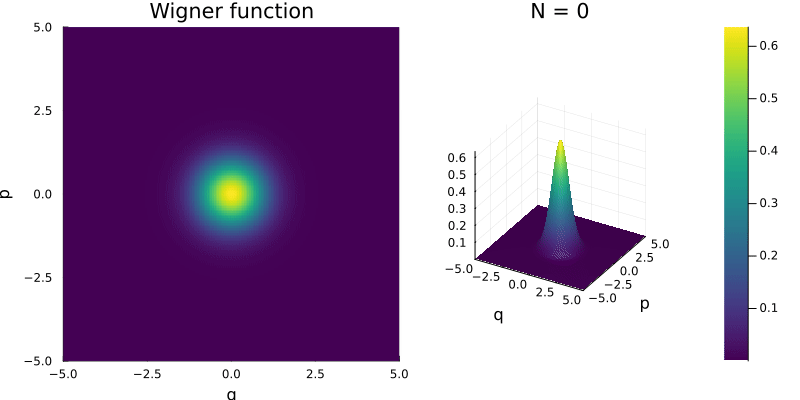

In [30]:
function laguerre(λ, N)
    values = 0
    N_fact = factorial(big(N))
    nn = range(0, stop=N, step=1)
    for n in nn
        values += ( λ^n / (factorial(big(n)))^2) * (N_fact/factorial(big(N-n))) * (-1)^n
    end
    return values
end

function W(q, p, n)
    α = (q + im * p) / sqrt(2)
    factor = 2* (-1)^n * exp(-2*abs(α)^2)/ π
    L = laguerre(4*abs(α)^2, n)
    return factor * L 
end

# Plot Wigner function
function wigner_heatmap(n)
    x = -5:0.05:5
    p = -5:0.05:5
    # make rectangular grid heatmap
    heatmap(x, p, (x, p) -> W(x, p, n), title="Wigner function", xlabel="q",
     ylabel="p",  xlims=(-5, 5), ylims=(-5, 5), color=:viridis, colorbar=false)
end

function wigner_3d(n)
    x = -5:0.05:5
    p = -5:0.05:5
    # make a 3d surface plot
    surface(x, p, (x, p) -> W(x, p, n), title="N = $n", xlabel="q",
     ylabel="p",  xlims=(-5, 5), ylims=(-5, 5), color=:viridis,)
end

anim = @animate for n in 0:1:10
    p1 = wigner_heatmap(n)
    p2 = wigner_3d(n)
    plot(p1, p2, layout=(1,2), size=(800, 400),)
end
gif(anim, "wigner.gif", fps = 2)

On the other hand, for a coherent state, we will get:

$$W_\alpha = \frac{2}{\pi} e^{-2|\alpha|^2}$$

which is a simple well behaved function.

### Conclusions

We saw how to build coherent states, and we saw that they are the states that minimize the uncertainty principle for the quadrature components of the electric field. We also saw that the quadrature components of the electric field are conjugate variables, and that we can define a joint probability distribution for them, which is the Wigner function.
